<a href="https://colab.research.google.com/github/kanagapriya3/deep-learning-projects/blob/main/Another_copy_of_Brain_tumor_detection_using_deep_learning_algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brain tumor detection and classification using deep learning algorithms:** - SK.KANAGA PRIYA

Three stages :
image preprocessing,
image classification,
image segmentation

Deep learning algorithm used:
1.Convolutional neural network,
2.Resnet 50,
3.VGG 16,
4.VGG 19,
5.EfficientNet B0,
6.EfficientNetV2B0,
7. Densenet

In [ ]:
import zipfile

In [ ]:
zf="/content/brain dataset.zip"

In [ ]:
target_dir = "/content/brain dataset"

In [ ]:
zfile = zipfile.ZipFile

In [ ]:
with zipfile.ZipFile(zf, 'r') as zip_ref:
    zip_ref.extractall(target_dir)
    print("zip file extracted successfully")

zip file extracted successfully


In [ ]:
# import the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import cv2
import warnings
warnings.filterwarnings('ignore')

Stage 1 :image preprocessing

In [ ]:
import cv2
import numpy as np

# Function to increase brightness and contrast
def adjust_brightness_contrast(image, brightness_value, contrast_factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # Adjust brightness
    v = cv2.add(v, brightness_value)
    v = np.clip(v, 0, 255)

    # Adjust contrast
    v = np.multiply(v, contrast_factor)
    v = np.clip(v, 0, 255)

    # Ensure all channels have the same size and depth
    h = np.uint8(h)
    s = np.uint8(s)
    v = np.uint8(v)

    final_hsv = cv2.merge([h, s, v])
    adjusted_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    return adjusted_image
# Function to increase brightness
def increase_brightness(image, brightness_value, contrast_factor=1.0):
    adjusted_image = adjust_brightness_contrast(image, brightness_value, contrast_factor)
    return adjusted_image

# Function to sharpen the image
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Function to reduce noise using Gaussian blur
def reduce_noise(image, kernel_size=(5, 5)):
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image


In [ ]:
# Define Directories for training, testing
train_path = '/content/brain dataset/brain dataset/Training'
test_path = '/content/brain dataset/brain dataset/Testing'


In [ ]:
import os
import cv2
X_train = []
Y_train = []
image_size =256
labels = {0:'glioma_tumor',
          1:'meningioma_tumor',
          2:'no_tumor',
          3:'pituitary_tumor'}
# Load and process training images
for label_index in labels:
    folderpath = os.path.join(train_path, labels[label_index])
    for j in os.listdir(folderpath):
        img_path = os.path.join(folderpath, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
             # Image enhancements
            img_brightened = increase_brightness(img, brightness_value=30, contrast_factor=1.5)  # Increase brightness by 30
            img_sharpened = sharpen_image(img_brightened)   # Sharpen the image
            img_enhanced = reduce_noise(img_sharpened)      # Reduce noise using Gaussian blur

            X_train.append(img_enhanced)
            Y_train.append(label_index)
        else:
            print(f"Error loading image: {img_path}")


In [ ]:
print (Y_train)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
X_test = []
Y_test = []
for label_index in labels:
    folderpath = os.path.join(test_path, labels[label_index])
    for j in os.listdir(folderpath):
        img_path = os.path.join(folderpath, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))

            # Image enhancements
            img_brightened = increase_brightness(img, brightness_value=30, contrast_factor=1.5)  # Increase brightness by 30
            img_sharpened = sharpen_image(img_brightened)   # Sharpen the image
            img_enhanced = reduce_noise(img_sharpened)      # Reduce noise using Gaussian blur

            X_test.append(img_enhanced)
            Y_test.append(label_index)
        else:
            print(f"Error loading image: {img_path}")

In [ ]:
print (Y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
from sklearn.utils import shuffle
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(2870, 256, 256, 3)

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test, Y_test = shuffle(X_test, Y_test, random_state=101)
X_test.shape

(394, 256, 256, 3)

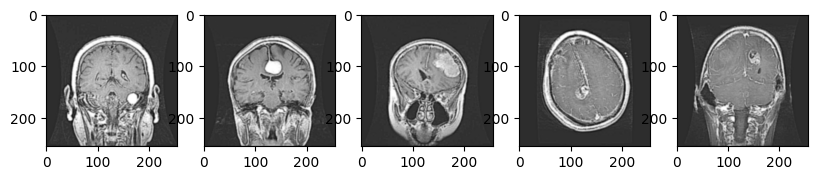

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(0,5):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap="gray")
  plt.axis('on')
plt.show()

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2870, 256, 256, 3)
(2870,)
(394, 256, 256, 3)
(394,)


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# First, split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)


# Print the number of samples in the training, validation, and testing sets
print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Total number of samples:", len(X_train) + len(X_test))

Number of training samples: 2296
Number of testing samples: 574
Total number of samples: 2870


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)


In [ ]:
from keras.utils import to_categorical
# One-Hot Encoding
num_classes = 4
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=num_classes)

# Convert to NumPy arrays
Y_train = np.array(Y_train)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
X_test = np.array(X_test)


In [ ]:
#Building the CNN
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import l2


In [ ]:
num_classes = 4

model = Sequential()
model.add(Conv2D(32,(3,3),activation= 'relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 254, 254, 32)      896       
                                                                 
 conv2d_115 (Conv2D)         (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 126, 126, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_116 (Conv2D)         (None, 124, 124, 64)      36928     
                                                                 
 dropout_26 (Dropout)        (None, 124, 124, 64)      0         
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
batch_size = 32

In [ ]:
history = model.fit(
    X_train,  # Training data (input)
    Y_train,  # Training labels (target)
    validation_data=(X_test, Y_test),  # Validation data and labels
    epochs=25,  # Number of epochs
    batch_size=batch_size  # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/25
72/72 [==============================] - 25s 291ms/step - loss: 20.3377 - accuracy: 0.4260 - val_loss: 4.9010 - val_accuracy: 0.4599
Epoch 2/25
72/72 [==============================] - 19s 263ms/step - loss: 4.3421 - accuracy: 0.5253 - val_loss: 4.1106 - val_accuracy: 0.5331
Epoch 3/25
72/72 [==============================] - 19s 264ms/step - loss: 3.7379 - accuracy: 0.5841 - val_loss: 3.5315 - val_accuracy: 0.6463
Epoch 4/25
72/72 [==============================] - 19s 264ms/step - loss: 3.3435 - accuracy: 0.6206 - val_loss: 3.1651 - val_accuracy: 0.6899
Epoch 5/25
72/72 [==============================] - 19s 264ms/step - loss: 3.0110 - accuracy: 0.6485 - val_loss: 2.9492 - val_accuracy: 0.6638
Epoch 6/25
72/72 [==============================] - 19s 265ms/step - loss: 2.7634 - accuracy: 0.6716 - val_loss: 2.6536 - val_accuracy: 0.7073
Epoch 7/25
72/72 [==============================] - 19s 266ms/step - loss: 2.5386 - accuracy: 0.6912 - val_loss: 2.5135 - val_accuracy: 0.749

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_train, Y_train)
print("loss:",loss)
print("Accuracy:", accuracy)

72/72 [==============================] - 3s 41ms/step - loss: 0.7832 - accuracy: 0.9926
loss: 0.7832161784172058
Accuracy: 0.9925957918167114


In [ ]:
#Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("val_loss:",val_loss)
print("val_Accuracy:", val_accuracy)

18/18 [==============================] - 1s 45ms/step - loss: 1.0333 - accuracy: 0.8885
val_loss: 1.0333125591278076
val_Accuracy: 0.888501763343811


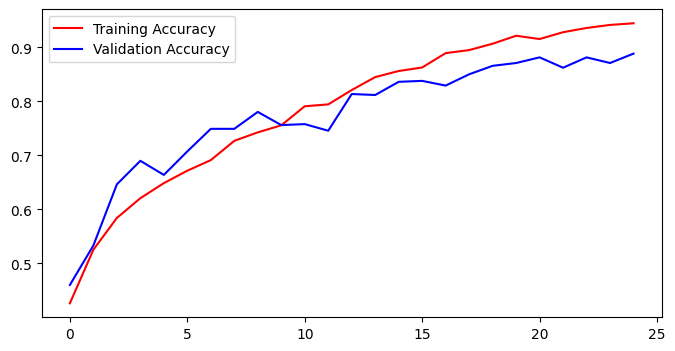

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#epochs = range(len(acc))
fig = plt.figure(figsize=(8,4))
plt.plot(acc,'r',label="Training Accuracy")
plt.plot(val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

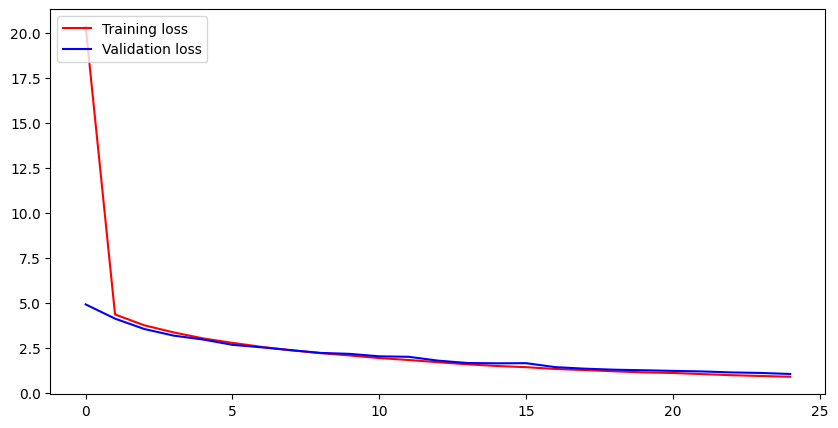

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Predicting the Results

In [ ]:
img = cv2.imread('/content/brain dataset/brain dataset/Testing/meningioma_tumor/image(39).jpg')
img = cv2.resize(img,(256,256))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,256,256,3)
img_array.shape

(1, 256, 256, 3)

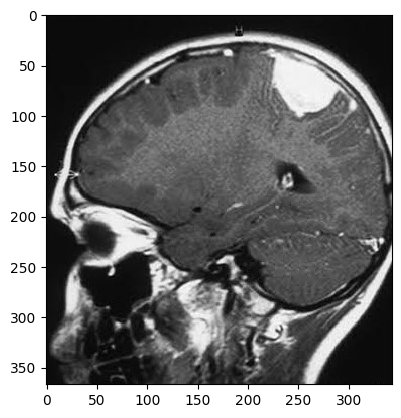

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain dataset/brain dataset/Testing/meningioma_tumor/image(39).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

1/1 [==============================] - 0s 31ms/step
predicted_labels is meningioma_tumor


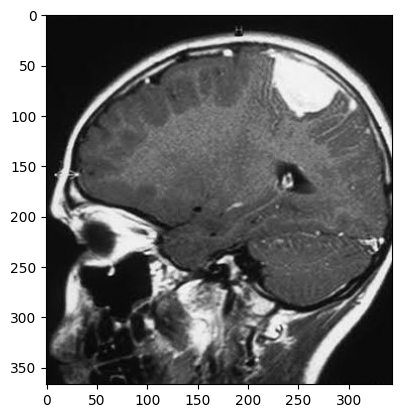

In [ ]:
a=efficient_model.predict(img_array)
indices = a.argmax()
predicted_labels = labels[indices]
print("predicted_labels is",predicted_labels)
plt.imshow(img)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for cnn:")
print(conf_matrix)
print("\nClassification Report for cnn:")
print(class_report)

18/18 [==============================] - 1s 48ms/step
Confusion Matrix for cnn:
[[151  19   0   3]
 [ 16 122  10   7]
 [  3   1  82   1]
 [  1   1   2 155]]

Classification Report for cnn:
                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.87      0.88       173
meningioma_tumor       0.85      0.79      0.82       155
        no_tumor       0.87      0.94      0.91        87
 pituitary_tumor       0.93      0.97      0.95       159

        accuracy                           0.89       574
       macro avg       0.89      0.89      0.89       574
    weighted avg       0.89      0.89      0.89       574



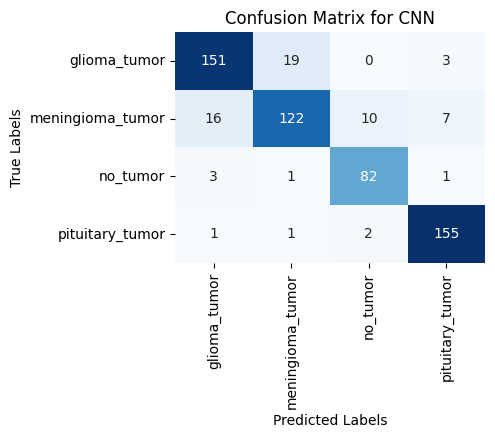

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN')
plt.show()

Image Segmentation

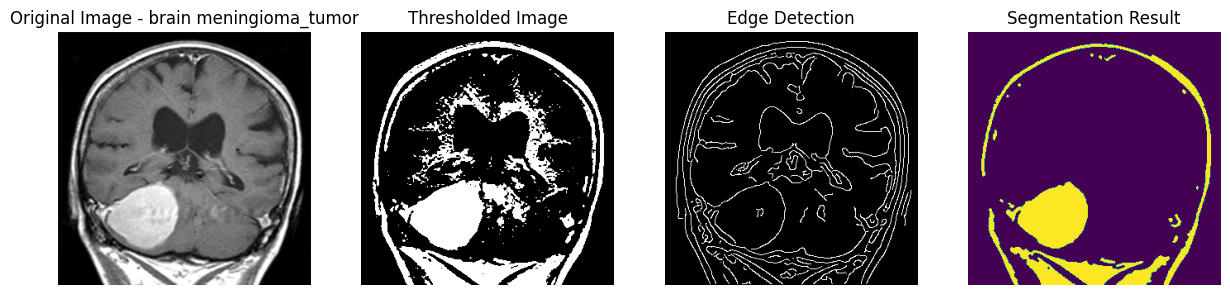

In [ ]:
import cv2
import numpy as np
from skimage import segmentation, morphology, color, data
from skimage.feature import canny
from skimage.filters import sobel
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Load the medical image
image_path = '/content/image(14).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = canny(image, sigma=2)  # Adjust sigma based on your image characteristics

# Create a row-wise layout for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image - brain meningioma_tumor')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display the edges image
plt.subplot(1, 4, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Region Segmentation
# Compute the elevation map using Sobel filter
elevation_map = sobel(image)

# Define markers for watershed segmentation
markers = np.zeros_like(image)
markers[image < 127] = 1  # Modify the threshold based on your image characteristics
markers[image > 200] = 2  # Modify the threshold based on your image characteristics

# Perform watershed region segmentation
segmentation_result = segmentation.watershed(elevation_map, markers)

# Display the segmented result
plt.subplot(1, 4, 4)
plt.imshow(segmentation_result, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')

plt.show()


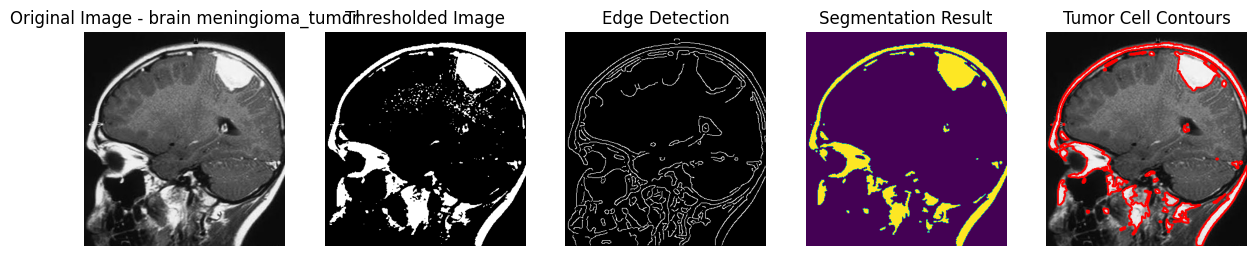

In [ ]:
import cv2
import numpy as np
from skimage import segmentation, morphology, color, data
from skimage.feature import canny
from skimage.filters import sobel
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Load the medical image
image_path = '/content/brain dataset/brain dataset/Testing/meningioma_tumor/image(39).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = canny(image, sigma=2)  # Adjust sigma based on your image characteristics

# Create a row-wise layout for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image - brain meningioma_tumor')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display the edges image
plt.subplot(1, 5, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Region Segmentation
# Compute the elevation map using Sobel filter
elevation_map = sobel(image)

# Define markers for watershed segmentation
markers = np.zeros_like(image)
markers[image < 127] = 1  # Modify the threshold based on your image characteristics
markers[image > 200] = 2  # Modify the threshold based on your image characteristics

# Perform watershed region segmentation
segmentation_result = segmentation.watershed(elevation_map, markers)

# Display the segmented result
plt.subplot(1, 5, 4)
plt.imshow(segmentation_result, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')

# Extract contours of segmented regions
contours, _ = cv2.findContours((segmentation_result == 2).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = np.zeros_like(image)
# Draw contours on a separate image with color
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for color visualization
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Use blue color (BGR format) for outlines


# Display the contour image
plt.subplot(1,5,5)
plt.imshow(contour_image, cmap='gray')
plt.title('Tumor Cell Contours')
plt.axis('off')

plt.show()


**Building the RESNET 50 model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
#building the resnet model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
resnet_model.add(Dropout(0.5))
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_5 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 module_wrapper_6 (ModuleWr  (None, 512)               262656    
 apper)                                                          
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 module_wrapper_7 (ModuleWr  (None, 512)              

In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
resnet_history = resnet_model.fit(
    X_train,  # Training data (input)
    Y_train,  # Training labels (target)
    validation_data=(X_test, Y_test),  # Validation data and labels
    epochs=10,  # Number of epochs
    batch_size = 32  # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/10
72/72 [==============================] - 11s 151ms/step - loss: 0.1968 - accuracy: 0.9260 - val_loss: 0.2502 - val_accuracy: 0.8955
Epoch 2/10
72/72 [==============================] - 11s 153ms/step - loss: 0.2134 - accuracy: 0.9225 - val_loss: 0.2634 - val_accuracy: 0.8990
Epoch 3/10
72/72 [==============================] - 11s 158ms/step - loss: 0.2185 - accuracy: 0.9220 - val_loss: 0.2594 - val_accuracy: 0.8920
Epoch 4/10
72/72 [==============================] - 11s 146ms/step - loss: 0.2142 - accuracy: 0.9199 - val_loss: 0.2852 - val_accuracy: 0.8955
Epoch 5/10
72/72 [==============================] - 11s 153ms/step - loss: 0.2034 - accuracy: 0.9233 - val_loss: 0.2914 - val_accuracy: 0.8972
Epoch 6/10
72/72 [==============================] - 11s 152ms/step - loss: 0.1967 - accuracy: 0.9277 - val_loss: 0.2817 - val_accuracy: 0.8920
Epoch 7/10
72/72 [==============================] - 11s 152ms/step - loss: 0.1573 - accuracy: 0.9447 - val_loss: 0.2902 - val_accuracy: 0.9059

In [ ]:
#Evaluate the model
loss, accuracy = resnet_model.evaluate(X_train, Y_train)
print("loss:",loss)
print("Accuracy:", accuracy)

72/72 [==============================] - 8s 108ms/step - loss: 0.1221 - accuracy: 0.9673
loss: 0.12206607311964035
Accuracy: 0.967334508895874


In [ ]:
#Evaluate the model
val_loss, val_accuracy =resnet_model.evaluate(X_test, Y_test)
print("val_loss:",val_loss)
print("val_Accuracy:", val_accuracy)

18/18 [==============================] - 2s 111ms/step - loss: 0.1859 - accuracy: 0.9321
val_loss: 0.18587073683738708
val_Accuracy: 0.9320557713508606


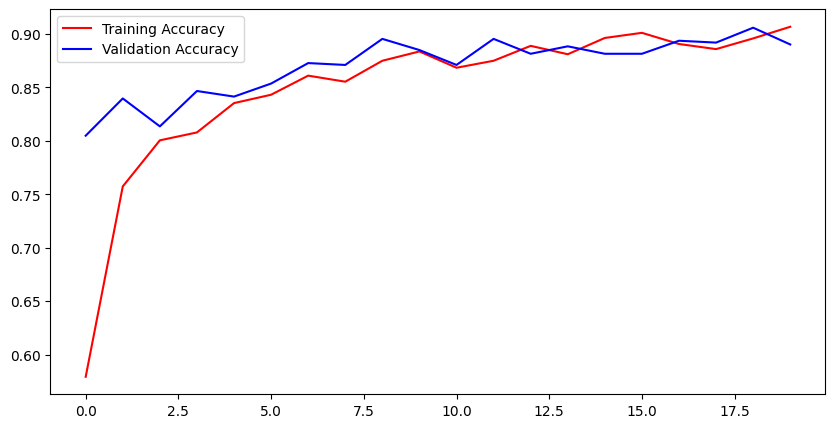

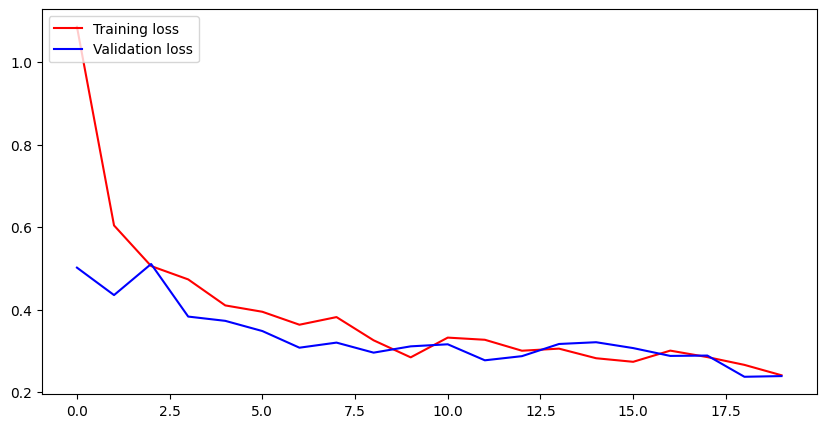

In [ ]:
#plot the accuracy and loss in resnet mode;
accuracy = resnet_history.history['accuracy']
val_accuracy = resnet_history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()

loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = resnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for resnet 50:")
print(conf_matrix)
print("\nClassification Report for resnet 50:")
print(class_report)

18/18 [==============================] - 4s 115ms/step
Confusion Matrix for resnet 50:
[[158  14   0   1]
 [  9 138   1   7]
 [  0   4  81   2]
 [  0   1   0 158]]

Classification Report for resnet 50:
                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.91      0.93       173
meningioma_tumor       0.88      0.89      0.88       155
        no_tumor       0.99      0.93      0.96        87
 pituitary_tumor       0.94      0.99      0.97       159

        accuracy                           0.93       574
       macro avg       0.94      0.93      0.93       574
    weighted avg       0.93      0.93      0.93       574



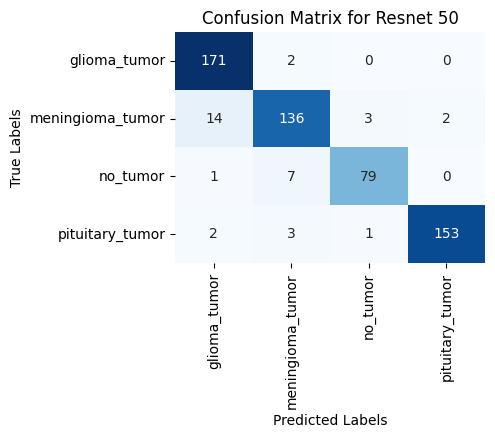

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Resnet 50')
plt.show()

**building the efficientNetB0**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, optimizers



In [ ]:
effnet_model = Sequential()
effpretrained_model = keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='Avg',
    classes=4,
    classifier_activation="softmax",
)

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
for layer in effpretrained_model.layers:
        layer.trainable=False

effnet_model.add(effpretrained_model)

effnet_model.add(Dense(512, activation='relu'))
effnet_model.add(Dropout(0.5))
effnet_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
effnet_model.add(Dropout(0.5))
effnet_model.add(Flatten())
effnet_model.add(Dense(512, activation='relu'))
effnet_model.add(Dense(4, activation='softmax'))
effnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 module_wrapper_10 (ModuleW  (None, 8, 8, 512)         655872    
 rapper)                                                         
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 512)         0         
                                                                 
 module_wrapper_11 (ModuleW  (None, 8, 8, 512)         262656    
 rapper)                                                         
                                                                 
 dropout_11 (Dropout)        (None, 8, 8, 512)         0         
                                                      

In [ ]:
effnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
effnet_history = effnet_model.fit(
    X_train,  # Training data (input)
    Y_train,  # Training labels (target)
    validation_data=(X_test, Y_test),  # Validation data and labels
    epochs=25,  # Number of epochs
    batch_size = 32 # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/25
72/72 [==============================] - 26s 184ms/step - loss: 2.3489 - accuracy: 0.5427 - val_loss: 0.5799 - val_accuracy: 0.8118
Epoch 2/25
72/72 [==============================] - 7s 100ms/step - loss: 0.4794 - accuracy: 0.8118 - val_loss: 0.3709 - val_accuracy: 0.8641
Epoch 3/25
72/72 [==============================] - 7s 98ms/step - loss: 0.3378 - accuracy: 0.8632 - val_loss: 0.4080 - val_accuracy: 0.8258
Epoch 4/25
72/72 [==============================] - 7s 101ms/step - loss: 0.2592 - accuracy: 0.9024 - val_loss: 0.2863 - val_accuracy: 0.8850
Epoch 5/25
72/72 [==============================] - 7s 99ms/step - loss: 0.2031 - accuracy: 0.9177 - val_loss: 0.2547 - val_accuracy: 0.9129
Epoch 6/25
72/72 [==============================] - 7s 101ms/step - loss: 0.2011 - accuracy: 0.9281 - val_loss: 0.2216 - val_accuracy: 0.9199
Epoch 7/25
72/72 [==============================] - 7s 101ms/step - loss: 0.1695 - accuracy: 0.9399 - val_loss: 0.2332 - val_accuracy: 0.9094
Epoch 8

In [ ]:
#Evaluate the model
val_loss, val_accuracy =effnet_model.evaluate(X_test, Y_test)
print("val_loss:",val_loss)
print("val_Accuracy:", val_accuracy)

18/18 [==============================] - 1s 75ms/step - loss: 0.2147 - accuracy: 0.9477
val_loss: 0.21474669873714447
val_Accuracy: 0.9477351903915405


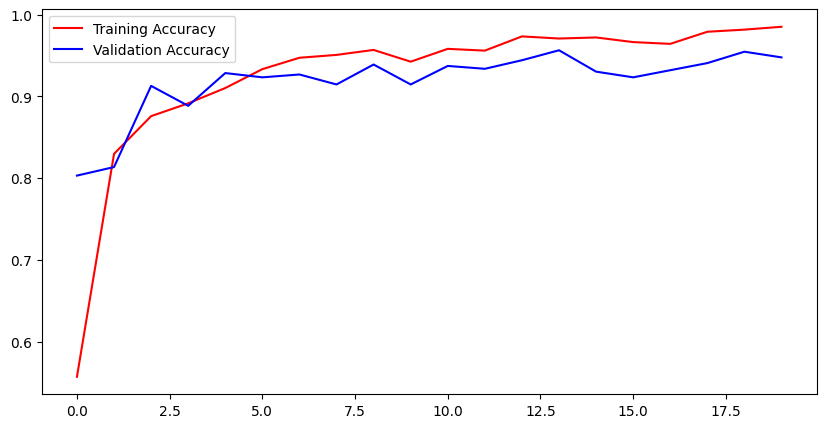

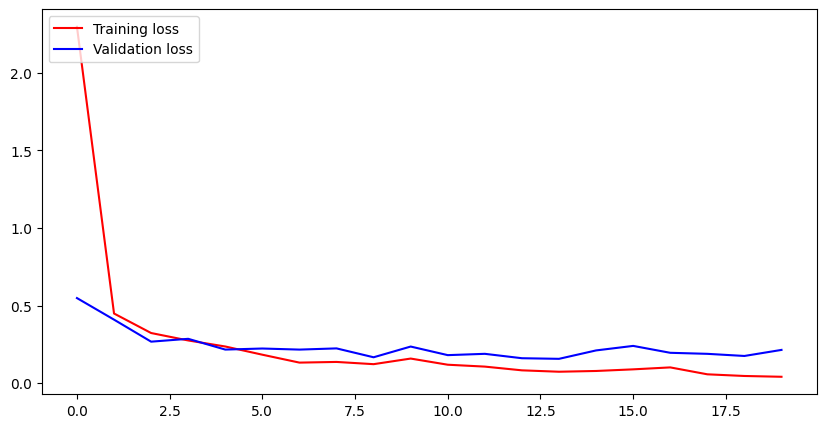

In [ ]:
#plot the accuracy and loss in resnet mode;
accuracy =effnet_history.history['accuracy']
val_accuracy = effnet_history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()

loss = effnet_history.history['loss']
val_loss = effnet_history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = effnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for Efficientnet B0:")
print(conf_matrix)
print("\nClassification Report for Efficientnet B0:")
print(class_report)

18/18 [==============================] - 3s 73ms/step
Confusion Matrix for Efficientnet B0:
[[162  11   0   0]
 [  5 146   2   2]
 [  0   1  85   1]
 [  2   6   0 151]]

Classification Report for Efficientnet B0:
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.94      0.95       173
meningioma_tumor       0.89      0.94      0.92       155
        no_tumor       0.98      0.98      0.98        87
 pituitary_tumor       0.98      0.95      0.96       159

        accuracy                           0.95       574
       macro avg       0.95      0.95      0.95       574
    weighted avg       0.95      0.95      0.95       574



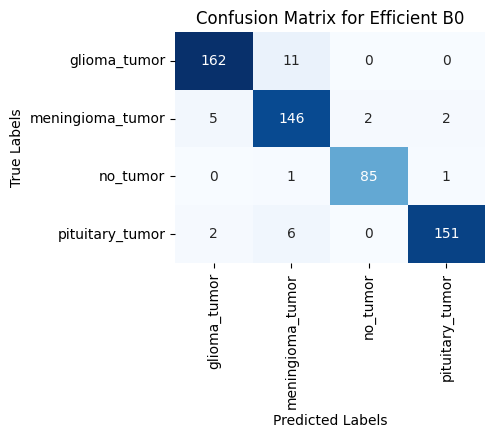

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Efficient B0')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg_model = Sequential()
vggpretrained_model = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='avg',
    classes=4,
    classifier_activation="softmax",
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vggpretrained_model.layers:
        layer.trainable=False

vgg_model.add(effpretrained_model)

vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
vgg_model.add(Dropout(0.5))
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(4, activation='softmax'))
vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 module_wrapper_5 (ModuleWr  (None, 8, 8, 512)         655872    
 apper)                                                          
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 512)         0         
                                                                 
 module_wrapper_6 (ModuleWr  (None, 8, 8, 512)         262656    
 apper)                                                          
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 512)         0         
                                                      

In [ ]:
vgg_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
vgg_history = vgg_model.fit(
    X_train,  # Training data (input)
    Y_train,  # Training labels (target)
    validation_data=(X_test, Y_test),  # Validation data and labels
    epochs=25,  # Number of epochs
    batch_size = 32  # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/25
72/72 [==============================] - 16s 126ms/step - loss: 1.6466 - accuracy: 0.6045 - val_loss: 0.5152 - val_accuracy: 0.8397
Epoch 2/25
72/72 [==============================] - 8s 118ms/step - loss: 0.4187 - accuracy: 0.8323 - val_loss: 0.3647 - val_accuracy: 0.8415
Epoch 3/25
72/72 [==============================] - 7s 101ms/step - loss: 0.2908 - accuracy: 0.8824 - val_loss: 0.3255 - val_accuracy: 0.8955
Epoch 4/25
72/72 [==============================] - 9s 121ms/step - loss: 0.2138 - accuracy: 0.9199 - val_loss: 0.2406 - val_accuracy: 0.9042
Epoch 5/25
72/72 [==============================] - 7s 101ms/step - loss: 0.1905 - accuracy: 0.9229 - val_loss: 0.3607 - val_accuracy: 0.8885
Epoch 6/25
72/72 [==============================] - 7s 101ms/step - loss: 0.1612 - accuracy: 0.9434 - val_loss: 0.2913 - val_accuracy: 0.8850
Epoch 7/25
72/72 [==============================] - 7s 101ms/step - loss: 0.1401 - accuracy: 0.9456 - val_loss: 0.2989 - val_accuracy: 0.9129
Epoch

In [ ]:
#Evaluate the model
val_loss, val_accuracy =vgg_model.evaluate(X_test, Y_test)
print("val_loss:",val_loss)
print("val_Accuracy:", val_accuracy)

18/18 [==============================] - 1s 76ms/step - loss: 0.2158 - accuracy: 0.9443
val_loss: 0.21580831706523895
val_Accuracy: 0.9442508816719055


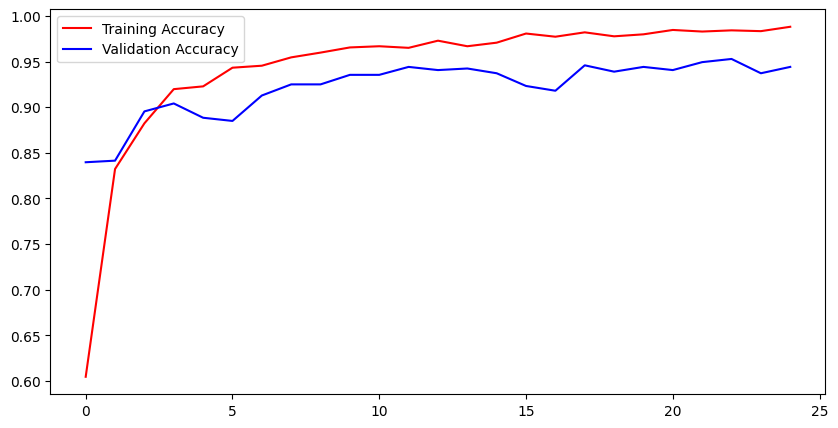

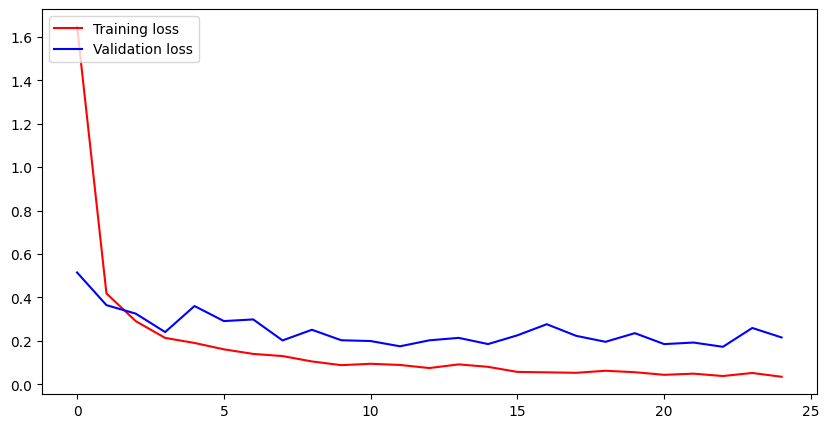

In [ ]:
#plot the accuracy and loss in resnet mode;
accuracy =vgg_history.history['accuracy']
val_accuracy = vgg_history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()

loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = vgg_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for vgg16:")
print(conf_matrix)
print("\nClassification Report for vgg16:")
print(class_report)

18/18 [==============================] - 3s 74ms/step
Confusion Matrix for vgg16:
[[167   4   0   2]
 [  8 139   3   5]
 [  3   3  80   1]
 [  1   2   0 156]]

Classification Report for vgg16:
                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.97      0.95       173
meningioma_tumor       0.94      0.90      0.92       155
        no_tumor       0.96      0.92      0.94        87
 pituitary_tumor       0.95      0.98      0.97       159

        accuracy                           0.94       574
       macro avg       0.95      0.94      0.94       574
    weighted avg       0.94      0.94      0.94       574



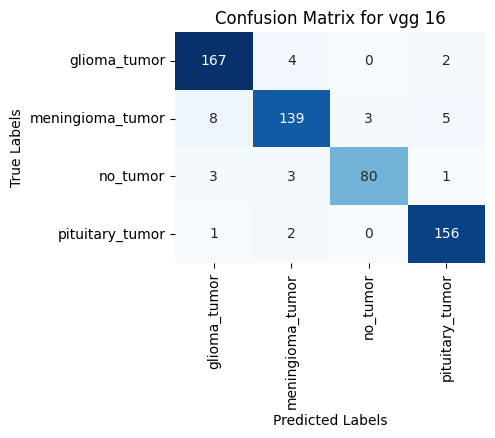

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for vgg 16')
plt.show()

efficientnetV2B0

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, optimizers



In [ ]:
efficient_model=Sequential()
efficientpretrained_model = keras.applications.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='Avg',
    classes=4,
    classifier_activation="softmax",

)

In [ ]:
for layer in efficientpretrained_model.layers:
        layer.trainable=False

efficient_model.add(efficientpretrained_model)
efficient_model.add(Dense(512, activation='relu'))
efficient_model.add(Dropout(0.5))
efficient_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
efficient_model.add(Dropout(0.5))
efficient_model.add(Flatten())
efficient_model.add(Dense(512, activation='relu'))
efficient_model.add(Dense(4, activation='softmax'))
efficient_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 8, 8, 1280)        5919312   
 nal)                                                            
                                                                 
 module_wrapper_34 (ModuleW  (None, 8, 8, 512)         655872    
 rapper)                                                         
                                                                 
 dropout_22 (Dropout)        (None, 8, 8, 512)         0         
                                                                 
 module_wrapper_35 (ModuleW  (None, 8, 8, 512)         262656    
 rapper)                                                         
                                                                 
 dropout_23 (Dropout)        (None, 8, 8, 512)         0         
                                                      

In [ ]:
efficient_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
efficient_history = efficient_model.fit(
     X_train,  # Training data (input)
    Y_train,  # Training labels (target)
    validation_data=(X_test, Y_test),  # Validation data and labels
    epochs=5,  # Number of epochs
    batch_size = 64  # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/5
36/36 [==============================] - 7s 193ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.1461 - val_accuracy: 0.9634
Epoch 2/5
36/36 [==============================] - 5s 153ms/step - loss: 0.0076 - accuracy: 0.9965 - val_loss: 0.1751 - val_accuracy: 0.9617
Epoch 3/5
36/36 [==============================] - 6s 165ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.1599 - val_accuracy: 0.9634
Epoch 4/5
36/36 [==============================] - 6s 166ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.1843 - val_accuracy: 0.9564
Epoch 5/5
36/36 [==============================] - 6s 156ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.1788 - val_accuracy: 0.9704


In [ ]:
#Evaluate the model
val_loss, val_accuracy =efficient_model.evaluate(X_test, Y_test)
print("val_loss:",val_loss)
print("val_Accuracy:", val_accuracy)

18/18 [==============================] - 1s 64ms/step - loss: 0.2428 - accuracy: 0.9599
val_loss: 0.24278536438941956
val_Accuracy: 0.9599303007125854


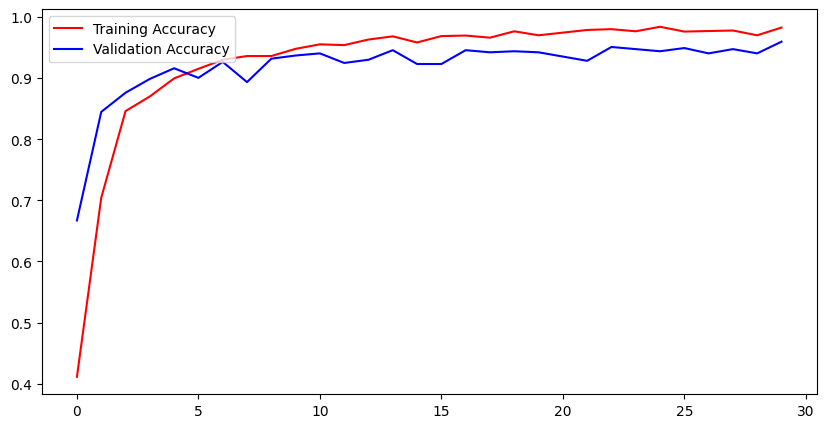

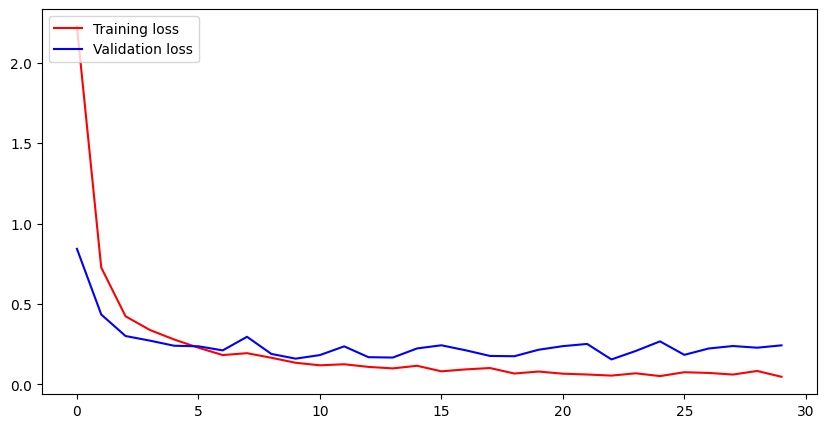

In [ ]:
#plot the accuracy and loss in efficientV2B0 mode;
accuracy =efficient_history.history['accuracy']
val_accuracy = efficient_history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()

loss = efficient_history.history['loss']
val_loss = efficient_history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = efficient_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for efficientV2 b0:")
print(conf_matrix)
print("\nClassification Report for efficientv2b0:")
print(class_report)

18/18 [==============================] - 3s 63ms/step
Confusion Matrix for efficientV2 b0:
[[171   2   0   0]
 [  1 147   4   3]
 [  0   3  83   1]
 [  0   2   1 156]]

Classification Report for efficientv2b0:
                  precision    recall  f1-score   support

    glioma_tumor       0.99      0.99      0.99       173
meningioma_tumor       0.95      0.95      0.95       155
        no_tumor       0.94      0.95      0.95        87
 pituitary_tumor       0.97      0.98      0.98       159

        accuracy                           0.97       574
       macro avg       0.97      0.97      0.97       574
    weighted avg       0.97      0.97      0.97       574



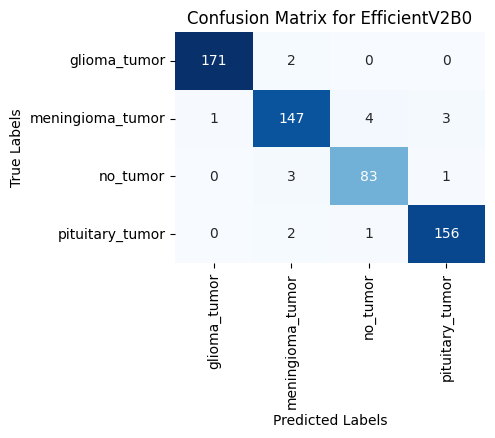

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for EfficientV2B0')
plt.show()

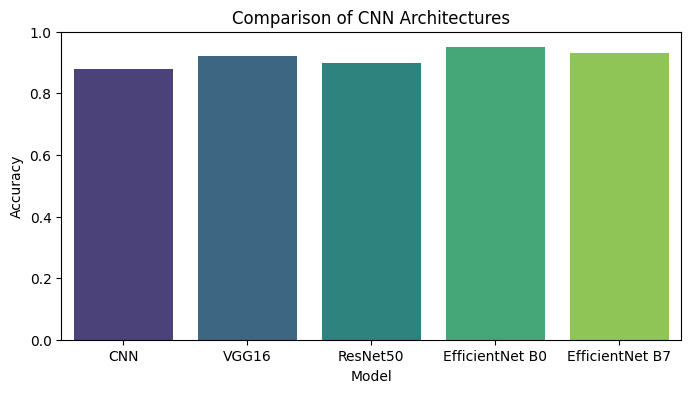

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy values for each model
models = ['CNN', 'VGG16', 'ResNet50', 'EfficientNet B0', 'EfficientNet B7']
accuracies = [0.88, 0.92, 0.90, 0.95, 0.93]

# Create a DataFrame for better Seaborn integration
import pandas as pd
data = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Use Seaborn to create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Comparison of CNN Architectures')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy between 0 and 1
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, optimizers

from keras.applications import VGG19

In [ ]:
VGG19_model = Sequential()
VGG19pretrained_model = keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='Avg',
    classes=4,
    classifier_activation="softmax",
)

for layer in VGG19pretrained_model.layers:
        layer.trainable=False

VGG19_model.add(VGG19pretrained_model)

VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dropout(0.5))
VGG19_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
VGG19_model.add(Dropout(0.5))
VGG19_model.add(Flatten())
VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dense(4, activation='softmax'))
VGG19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 module_wrapper_5 (ModuleWr  (None, 8, 8, 512)         262656    
 apper)                                                          
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 512)         0         
                                                                 
 module_wrapper_6 (ModuleWr  (None, 8, 8, 512)         262656    
 apper)                                                          
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 512)         0         
                                                                 
 module_wrapper_7 (ModuleWr  (None, 32768)            

In [ ]:
VGG19_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
VGG19_model_history = VGG19_model.fit(
     X_train,  # Training data (input)
     Y_train,  # Training labels (target)
     validation_data=(X_test, Y_test),  # Validation data and labels
     epochs=10,  # Number of epochs
     batch_size = 64  # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/10
36/36 [==============================] - 48s 1s/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.3476 - val_accuracy: 0.9129
Epoch 2/10
36/36 [==============================] - 20s 557ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.2126 - val_accuracy: 0.9477
Epoch 3/10
36/36 [==============================] - 22s 603ms/step - loss: 0.0434 - accuracy: 0.9843 - val_loss: 0.2492 - val_accuracy: 0.9321
Epoch 4/10
36/36 [==============================] - 21s 601ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.3080 - val_accuracy: 0.9199
Epoch 5/10
36/36 [==============================] - 20s 556ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.2904 - val_accuracy: 0.9286
Epoch 6/10
36/36 [==============================] - 22s 606ms/step - loss: 0.0254 - accuracy: 0.9930 - val_loss: 0.2483 - val_accuracy: 0.9390
Epoch 7/10
36/36 [==============================] - 22s 606ms/step - loss: 0.0144 - accuracy: 0.9948 - val_loss: 0.2621 - val_accuracy: 0.9321
Ep

In [ ]:
#Evaluate the model
val_loss, val_accuracy =VGG19_model.evaluate(X_test, Y_test)
print("val_loss:",val_loss)
print("val_Accuracy:", val_accuracy)

18/18 [==============================] - 3s 181ms/step - loss: 0.3274 - accuracy: 0.9338
val_loss: 0.32742559909820557
val_Accuracy: 0.9337978959083557


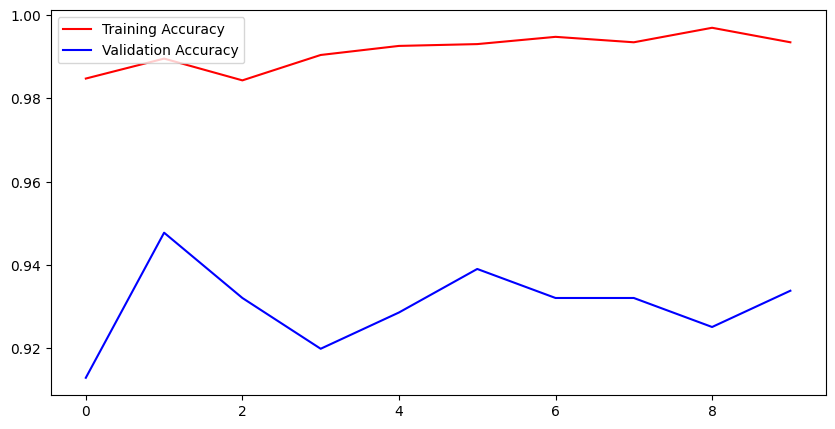

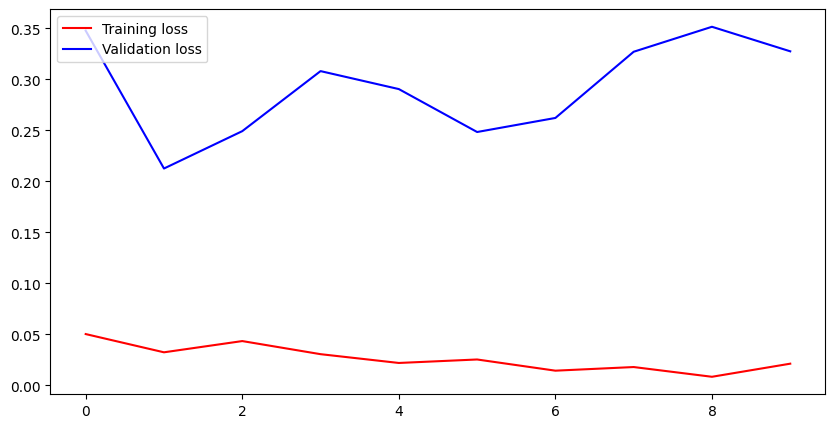

In [ ]:
#plot the accuracy and loss in VGG19 model;
accuracy = VGG19_model_history.history['accuracy']
val_accuracy = VGG19_model_history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()

loss = VGG19_model_history.history['loss']
val_loss = VGG19_model_history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = VGG19_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for VGG19:")
print(conf_matrix)
print("\nClassification Report for VGG19:")
print(class_report)

18/18 [==============================] - 3s 172ms/step
Confusion Matrix for VGG19:
[[165   8   0   0]
 [  6 140   4   5]
 [  1   4  77   5]
 [  3   2   0 154]]

Classification Report for VGG19:
                  precision    recall  f1-score   support

    glioma_tumor       0.94      0.95      0.95       173
meningioma_tumor       0.91      0.90      0.91       155
        no_tumor       0.95      0.89      0.92        87
 pituitary_tumor       0.94      0.97      0.95       159

        accuracy                           0.93       574
       macro avg       0.94      0.93      0.93       574
    weighted avg       0.93      0.93      0.93       574



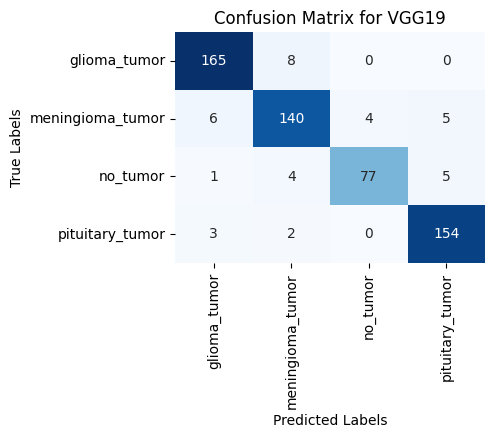

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for VGG19')
plt.show()

In [ ]:
from keras.applications import DenseNet121

In [ ]:
Densenet_model = Sequential()
Densenet_pretrained_model = keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256,256,3),
    pooling='Avg',
    classes=4,
    classifier_activation="softmax",
)

for layer in Densenet_pretrained_model.layers:
        layer.trainable=False

Densenet_model.add(Densenet_pretrained_model)
Densenet_model.add(Dense(512, activation='relu'))
Densenet_model.add(Dropout(0.5))
Densenet_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
Densenet_model.add(Dropout(0.5))
Densenet_model.add(Flatten())
Densenet_model.add(Dense(512, activation='relu'))
Densenet_model.add(Dense(4, activation='softmax'))
Densenet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 dense_13 (Dense)            (None, 8, 8, 512)         524800    
                                                                 
 dropout_31 (Dropout)        (None, 8, 8, 512)         0         
                                                                 
 dense_14 (Dense)            (None, 8, 8, 512)         262656    
                                                                 
 dropout_32 (Dropout)        (None, 8, 8, 512)         0         
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 512)              

In [ ]:
Densenet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
Densenet_model_history = Densenet_model.fit(
     X_train,  # Training data (input)
     Y_train,  # Training labels (target)
     validation_data=(X_test, Y_test),  # Validation data and labels
     epochs=15,  # Number of epochs
     batch_size = 32  # Batch size (can be adjusted based on memory and performance)
)

Epoch 1/15
72/72 [==============================] - 11s 158ms/step - loss: 0.3841 - accuracy: 0.9429 - val_loss: 0.5345 - val_accuracy: 0.8955
Epoch 2/15
72/72 [==============================] - 11s 159ms/step - loss: 0.3145 - accuracy: 0.9656 - val_loss: 0.5012 - val_accuracy: 0.9146
Epoch 3/15
72/72 [==============================] - 11s 160ms/step - loss: 0.2822 - accuracy: 0.9730 - val_loss: 0.6220 - val_accuracy: 0.9094
Epoch 4/15
72/72 [==============================] - 11s 151ms/step - loss: 0.2425 - accuracy: 0.9834 - val_loss: 0.5188 - val_accuracy: 0.9146
Epoch 5/15
72/72 [==============================] - 11s 151ms/step - loss: 0.2714 - accuracy: 0.9647 - val_loss: 0.5705 - val_accuracy: 0.9042
Epoch 6/15
72/72 [==============================] - 11s 151ms/step - loss: 0.2773 - accuracy: 0.9660 - val_loss: 0.5204 - val_accuracy: 0.8972
Epoch 7/15
72/72 [==============================] - 11s 152ms/step - loss: 0.2463 - accuracy: 0.9769 - val_loss: 0.6226 - val_accuracy: 0.8955

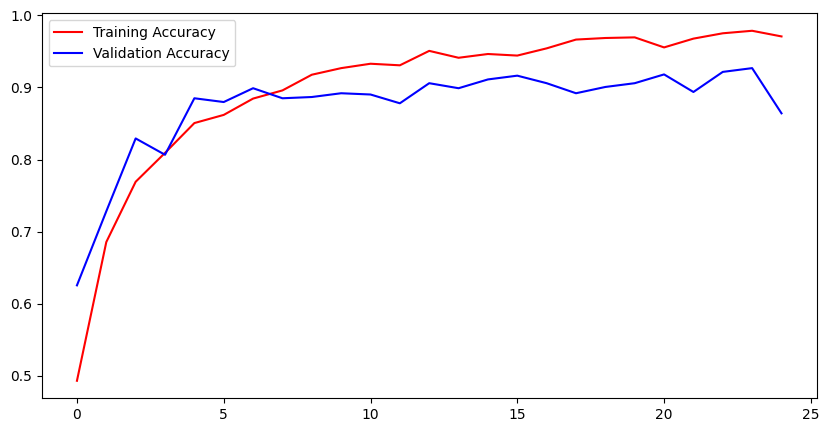

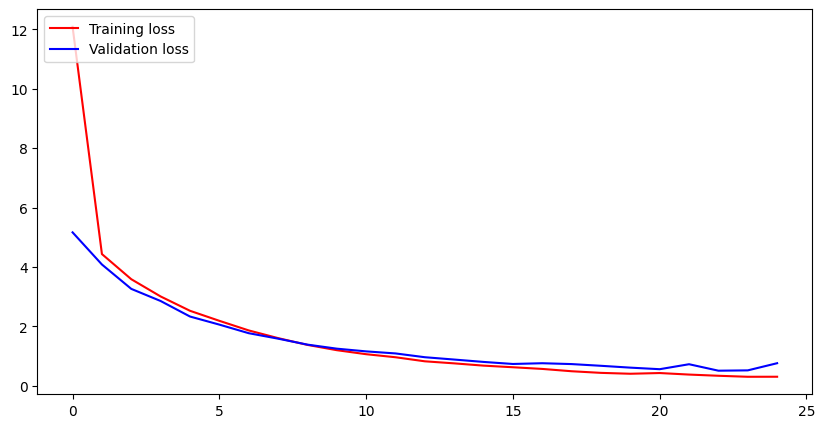

In [ ]:
#plot the accuracy and loss
accuracy = Densenet_model_history.history['accuracy']
val_accuracy = Densenet_model_history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()

loss = Densenet_model_history.history['loss']
val_loss = Densenet_model_history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')  # Ensure that the legend is placed in the upper-left corner
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get model predictions
y_pred = Densenet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_orig = np.argmax(Y_test, axis=1)
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred_classes)

# Generate classification report
class_report = classification_report(y_test_orig, y_pred_classes, target_names=list(labels.values()))

print("Confusion Matrix for Densenet_model:")
print(conf_matrix)
print("\nClassification Report for Densenet_model:")
print(class_report)

18/18 [==============================] - 2s 111ms/step
Confusion Matrix for Densenet_model:
[[166   5   0   2]
 [ 17 124   6   8]
 [  6   3  76   2]
 [  0   2   0 157]]

Classification Report for Densenet_model:
                  precision    recall  f1-score   support

    glioma_tumor       0.88      0.96      0.92       173
meningioma_tumor       0.93      0.80      0.86       155
        no_tumor       0.93      0.87      0.90        87
 pituitary_tumor       0.93      0.99      0.96       159

        accuracy                           0.91       574
       macro avg       0.91      0.91      0.91       574
    weighted avg       0.91      0.91      0.91       574



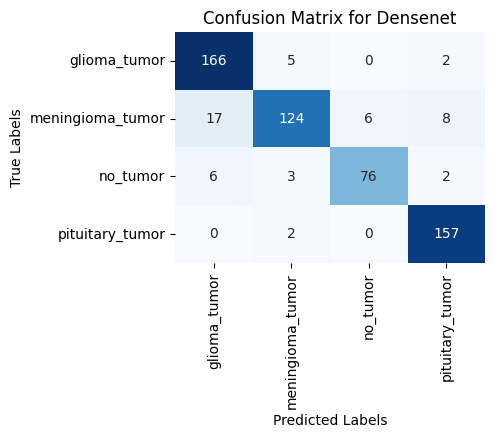

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Densenet')
plt.show()

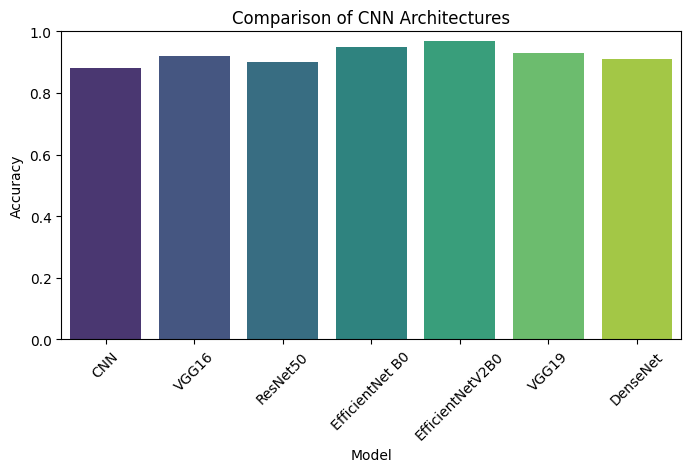

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy values for each model
models = ['CNN', 'VGG16', 'ResNet50', 'EfficientNet B0', 'EfficientNetV2B0', 'VGG19', 'DenseNet']
accuracies = [0.88, 0.92, 0.90, 0.95, 0.97, 0.93, 0.91]

# Create a DataFrame for better Seaborn integration
import pandas as pd
data = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Use Seaborn to create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Comparison of CNN Architectures')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy between 0 and 1
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


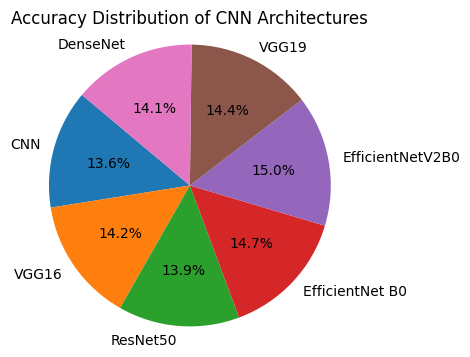

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each model
models = ['CNN', 'VGG16', 'ResNet50', 'EfficientNet B0', 'EfficientNetV2B0', 'VGG19', 'DenseNet']
accuracies = [0.88, 0.92, 0.90, 0.95, 0.97, 0.93, 0.91]

# Define a custom color palette
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Accuracy Distribution of CNN Architectures')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



18/18 [==============================] - 1s 60ms/step


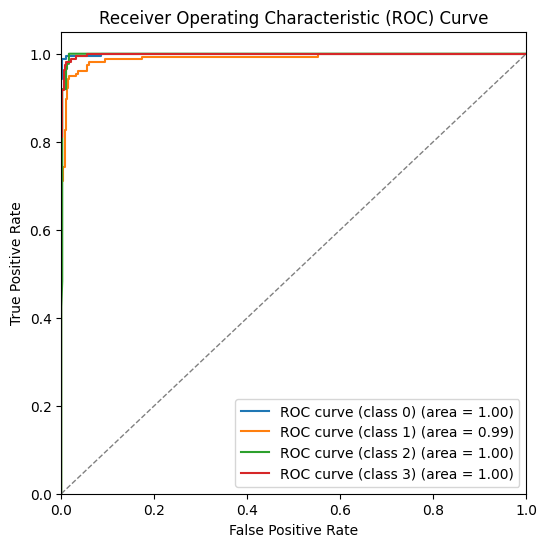

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for each class
y_pred_prob = efficient_model.predict(X_test)

# Calculate false positive rate (fpr) and true positive rate (tpr) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_orig == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(6, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Results :

1) CNN - Achieved an accuracy of 88%.

2) ResNet50 - Achieved an accuracy of 93%.

3) EfficientNet B0 - Achieved an accuracy of 95%.

4) VGG16 - Achieved an accuracy of 94%.

5) EfficientNetV2B0 - Achieved an accuracy of 96%.

6) VGG19 - Achieved an accuracy of 93%.

7) DenseNet - Achieved an accuracy of 91%.


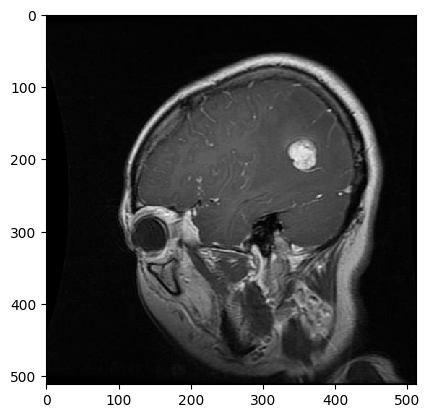

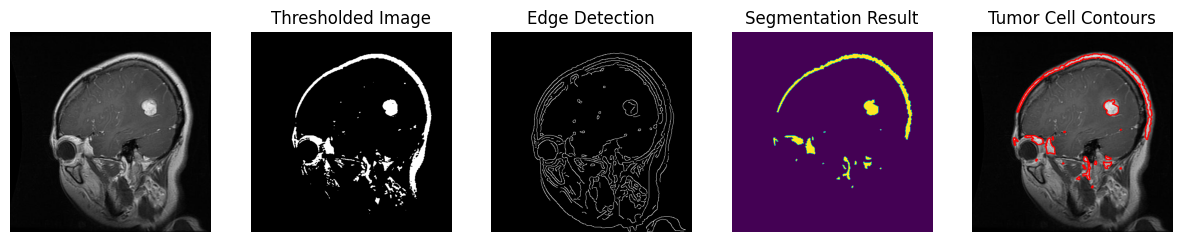

1/1 [==============================] - 0s 95ms/step
predicted_labels is glioma_tumor
18/18 [==============================] - 1s 68ms/step - loss: 0.1788 - accuracy: 0.9704
Model accuracy: 97.03832864761353
Model accuracy: 0.97%


In [ ]:
#predicting the results

img = cv2.imread('/content/brain dataset/brain dataset/Training/glioma_tumor/gg (202).jpg')
img = cv2.resize(img,(256,256))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,256,256,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain dataset/brain dataset/Training/glioma_tumor/gg (202).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
import cv2
import numpy as np
from skimage import segmentation, morphology, color, data
from skimage.feature import canny
from skimage.filters import sobel
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Load the medical image
image_path = '/content/brain dataset/brain dataset/Training/glioma_tumor/gg (202).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = canny(image, sigma=2)  # Adjust sigma based on your image characteristics

# Create a row-wise layout for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display the edges image
plt.subplot(1, 5, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Region Segmentation
# Compute the elevation map using Sobel filter
elevation_map = sobel(image)

# Define markers for watershed segmentation
markers = np.zeros_like(image)
markers[image < 127] = 1  # Modify the threshold based on your image characteristics
markers[image > 200] = 2  # Modify the threshold based on your image characteristics

# Perform watershed region segmentation
segmentation_result = segmentation.watershed(elevation_map, markers)

# Display the segmented result
plt.subplot(1, 5, 4)
plt.imshow(segmentation_result, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')

# Extract contours of segmented regions
contours, _ = cv2.findContours((segmentation_result == 2).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = np.zeros_like(image)
# Draw contours on a separate image with color
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for color visualization
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Use blue color (BGR format) for outlines


# Display the contour image
plt.subplot(1,5,5)
plt.imshow(contour_image, cmap='gray')
plt.title('Tumor Cell Contours')
plt.axis('off')

plt.show()

a=efficient_model.predict(img_array)
indices = a.argmax()
predicted_labels = labels[indices]
print("predicted_labels is",predicted_labels)
# Assuming you have your test data and labels ready
accuracy = efficient_model.evaluate(X_test, Y_test)[1]
print("Model accuracy:", accuracy * 100)
print("Model accuracy: {:.2f}%".format(accuracy))

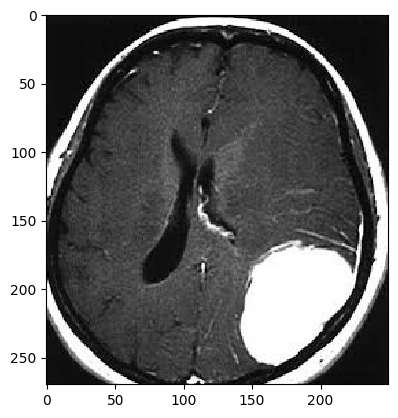

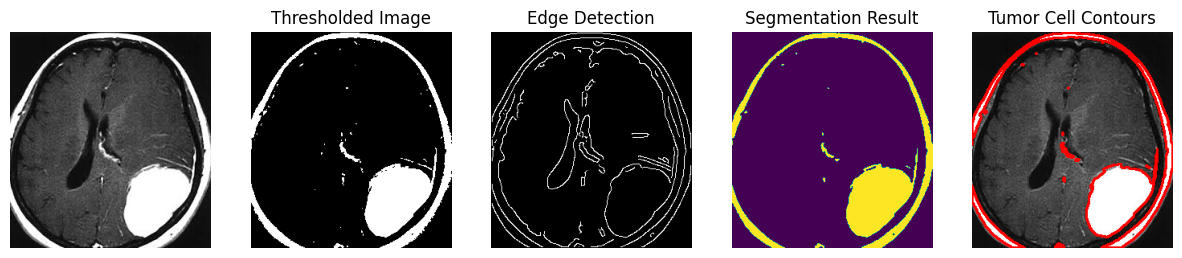

1/1 [==============================] - 0s 50ms/step
predicted_labels is meningioma_tumor
18/18 [==============================] - 1s 70ms/step - loss: 0.1788 - accuracy: 0.9704
Model accuracy: 97.03832864761353
Model accuracy: 0.97%


In [ ]:
#predicting the results

img = cv2.imread('/content/brain dataset/brain dataset/Training/meningioma_tumor/m1(102).jpg')
img = cv2.resize(img,(256,256))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,256,256,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain dataset/brain dataset/Training/meningioma_tumor/m1(102).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
import cv2
import numpy as np
from skimage import segmentation, morphology, color, data
from skimage.feature import canny
from skimage.filters import sobel
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Load the medical image
image_path = '/content/brain dataset/brain dataset/Training/meningioma_tumor/m1(102).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = canny(image, sigma=2)  # Adjust sigma based on your image characteristics

# Create a row-wise layout for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display the edges image
plt.subplot(1, 5, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Region Segmentation
# Compute the elevation map using Sobel filter
elevation_map = sobel(image)

# Define markers for watershed segmentation
markers = np.zeros_like(image)
markers[image < 127] = 1  # Modify the threshold based on your image characteristics
markers[image > 200] = 2  # Modify the threshold based on your image characteristics

# Perform watershed region segmentation
segmentation_result = segmentation.watershed(elevation_map, markers)

# Display the segmented result
plt.subplot(1, 5, 4)
plt.imshow(segmentation_result, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')

# Extract contours of segmented regions
contours, _ = cv2.findContours((segmentation_result == 2).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = np.zeros_like(image)
# Draw contours on a separate image with color
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for color visualization
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Use blue color (BGR format) for outlines


# Display the contour image
plt.subplot(1,5,5)
plt.imshow(contour_image, cmap='gray')
plt.title('Tumor Cell Contours')
plt.axis('off')

plt.show()

a=efficient_model.predict(img_array)
indices = a.argmax()
predicted_labels = labels[indices]
print("predicted_labels is",predicted_labels)
# Assuming you have your test data and labels ready
accuracy = efficient_model.evaluate(X_test, Y_test)[1]
print("Model accuracy:", accuracy * 100)
print("Model accuracy: {:.2f}%".format(accuracy))

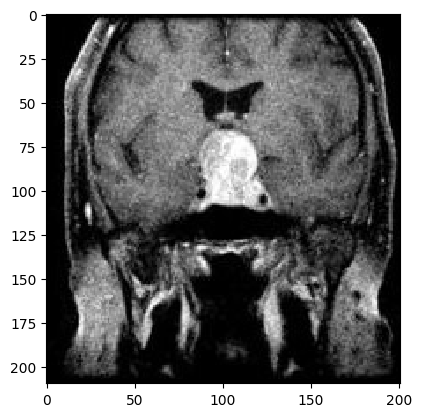

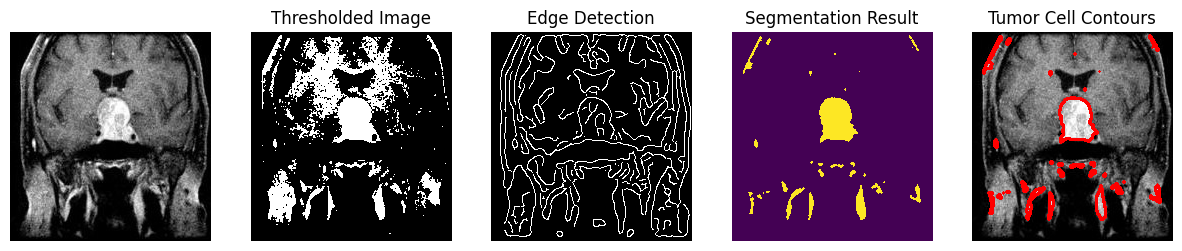

1/1 [==============================] - 0s 55ms/step
predicted_labels is pituitary_tumor
18/18 [==============================] - 1s 70ms/step - loss: 0.1788 - accuracy: 0.9704
Model accuracy: 97.03832864761353
Model accuracy: 0.97%


In [ ]:
#predicting the results

img = cv2.imread('/content/brain dataset/brain dataset/Training/pituitary_tumor/p (137).jpg')
img = cv2.resize(img,(256,256))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,256,256,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain dataset/brain dataset/Training/pituitary_tumor/p (137).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
import cv2
import numpy as np
from skimage import segmentation, morphology, color, data
from skimage.feature import canny
from skimage.filters import sobel
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Load the medical image
image_path = '/content/brain dataset/brain dataset/Training/pituitary_tumor/p (137).jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = canny(image, sigma=2)  # Adjust sigma based on your image characteristics

# Create a row-wise layout for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display the edges image
plt.subplot(1, 5, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Region Segmentation
# Compute the elevation map using Sobel filter
elevation_map = sobel(image)

# Define markers for watershed segmentation
markers = np.zeros_like(image)
markers[image < 127] = 1  # Modify the threshold based on your image characteristics
markers[image > 200] = 2  # Modify the threshold based on your image characteristics

# Perform watershed region segmentation
segmentation_result = segmentation.watershed(elevation_map, markers)

# Display the segmented result
plt.subplot(1, 5, 4)
plt.imshow(segmentation_result, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')

# Extract contours of segmented regions
contours, _ = cv2.findContours((segmentation_result == 2).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = np.zeros_like(image)
# Draw contours on a separate image with color
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for color visualization
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Use blue color (BGR format) for outlines


# Display the contour image
plt.subplot(1,5,5)
plt.imshow(contour_image, cmap='gray')
plt.title('Tumor Cell Contours')
plt.axis('off')

plt.show()

a=efficient_model.predict(img_array)
indices = a.argmax()
predicted_labels = labels[indices]
print("predicted_labels is",predicted_labels)
# Assuming you have your test data and labels ready
accuracy = efficient_model.evaluate(X_test, Y_test)[1]
print("Model accuracy:", accuracy * 100)
print("Model accuracy: {:.2f}%".format(accuracy))

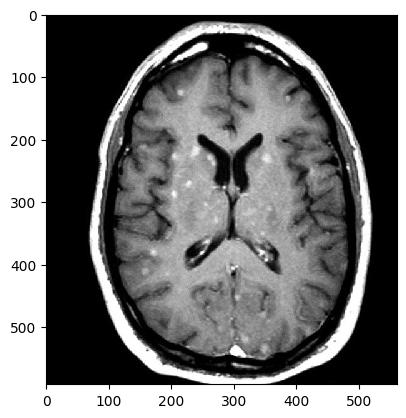

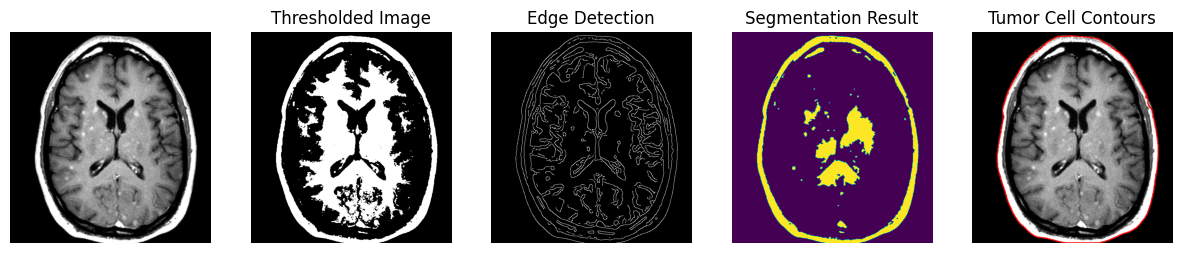

1/1 [==============================] - 0s 50ms/step
predicted_labels is no_tumor
18/18 [==============================] - 1s 74ms/step - loss: 0.1788 - accuracy: 0.9704
Model accuracy: 97.03832864761353
Model accuracy: 0.97%


In [ ]:
#predicting the results

img = cv2.imread('/content/brain dataset/brain dataset/Training/no_tumor/4.jpg')
img = cv2.resize(img,(256,256))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,256,256,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain dataset/brain dataset/Training/no_tumor/4.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
import cv2
import numpy as np
from skimage import segmentation, morphology, color, data
from skimage.feature import canny
from skimage.filters import sobel
import matplotlib.pyplot as plt
import scipy.ndimage as nd

# Load the medical image
image_path = '/content/brain dataset/brain dataset/Training/no_tumor/4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply binary thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = canny(image, sigma=2)  # Adjust sigma based on your image characteristics

# Create a row-wise layout for displaying images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the thresholded image
plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display the edges image
plt.subplot(1, 5, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Region Segmentation
# Compute the elevation map using Sobel filter
elevation_map = sobel(image)

# Define markers for watershed segmentation
markers = np.zeros_like(image)
markers[image < 127] = 1  # Modify the threshold based on your image characteristics
markers[image > 200] = 2  # Modify the threshold based on your image characteristics

# Perform watershed region segmentation
segmentation_result = segmentation.watershed(elevation_map, markers)

# Display the segmented result
plt.subplot(1, 5, 4)
plt.imshow(segmentation_result, cmap='viridis')
plt.title('Segmentation Result')
plt.axis('off')

# Extract contours of segmented regions
contours, _ = cv2.findContours((segmentation_result == 2).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a separate image
contour_image = np.zeros_like(image)
# Draw contours on a separate image with color
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert to RGB for color visualization
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Use blue color (BGR format) for outlines


# Display the contour image
plt.subplot(1,5,5)
plt.imshow(contour_image, cmap='gray')
plt.title('Tumor Cell Contours')
plt.axis('off')

plt.show()

a=efficient_model.predict(img_array)
indices = a.argmax()
predicted_labels = labels[indices]
print("predicted_labels is",predicted_labels)
# Assuming you have your test data and labels ready
accuracy = efficient_model.evaluate(X_test, Y_test)[1]
print("Model accuracy:", accuracy * 100)
print("Model accuracy: {:.2f}%".format(accuracy))